# 課題0705

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [47]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## 課題1

pandasでDataフォルダの```example.json```を読み込む。

In [48]:
import pandas as pd
df=pd.read_json("/Users/ryozawau/chss_2023_assignment/課題0705/Data/example.json",lines=True)
df

,Name,Price,Model,Power
0,Honda,10000,2005,1300
1,Toyota,12000,2010,1600
2,Audi,25000,2017,1800
3,Ford,28000,2009,1200


## 課題2

pandasでDataフォルダの```state-abbrevs.csv```、```state-areas.csv```、```state-population.csv```を読み込む。

これらのデータを使って、**2010年**アメリカの各州の人口密度を計算しよう。

In [49]:
pop = pd.read_csv('Data/state-population.csv')
areas = pd.read_csv('Data/state-areas.csv')
abbrevs = pd.read_csv('Data/state-abbrevs.csv')
display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [50]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [51]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423.0
1,AL,total,2012,4817528.0,Alabama,AL,52423.0
2,AL,under18,2010,1130966.0,Alabama,AL,52423.0
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
4,AL,under18,2011,1125763.0,Alabama,AL,52423.0


In [52]:
final["ages"].value_counts()

under18    1272
total      1272
Name: ages, dtype: int64

In [53]:
final=final.loc[(final['ages'] == 'total')&(final["year"]==2010),]
final

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
91,AK,total,2010,713868.0,Alaska,AK,656425.0
101,AZ,total,2010,6408790.0,Arizona,AZ,114006.0
189,AR,total,2010,2922280.0,Arkansas,AR,53182.0
197,CA,total,2010,37333601.0,California,CA,163707.0
283,CO,total,2010,5048196.0,Colorado,CO,104100.0
293,CT,total,2010,3579210.0,Connecticut,CT,5544.0
379,DE,total,2010,899711.0,Delaware,DE,1954.0
389,DC,total,2010,605125.0,District of Columbia,DC,68.0
475,FL,total,2010,18846054.0,Florida,FL,65758.0


In [54]:
final["density"] = final['population'] / final['area (sq. mi)']
final.dropna(inplace=True)
final

,state/region,ages,year,population,state,abbreviation,area (sq. mi),density
3,AL,total,2010,4785570.0,Alabama,AL,52423.0,91.287603
91,AK,total,2010,713868.0,Alaska,AK,656425.0,1.087509
101,AZ,total,2010,6408790.0,Arizona,AZ,114006.0,56.214497
189,AR,total,2010,2922280.0,Arkansas,AR,53182.0,54.948667
197,CA,total,2010,37333601.0,California,CA,163707.0,228.051342
283,CO,total,2010,5048196.0,Colorado,CO,104100.0,48.493718
293,CT,total,2010,3579210.0,Connecticut,CT,5544.0,645.600649
379,DE,total,2010,899711.0,Delaware,DE,1954.0,460.445752
389,DC,total,2010,605125.0,District of Columbia,DC,68.0,8898.897059
475,FL,total,2010,18846054.0,Florida,FL,65758.0,286.597129


In [61]:
import plotly.express as px
final = final.sort_values('density', ascending=False)
fig = px.bar(final, x='state/region', y='density')
fig.show()

## 課題3

```state/region```、```ages```と```years```でデータフレームをグループして、各グループで$\frac{population}{area (sq. mi)}$の形で人口密度を計算してください。

In [7]:
final

,state/region,ages,year,population,state,area (sq. mi),density
0,AL,under18,2012,1117489.0,Alabama,52423.0,21.316769
1,AL,total,2012,4817528.0,Alabama,52423.0,91.897221
2,AL,under18,2010,1130966.0,Alabama,52423.0,21.573851
3,AL,total,2010,4785570.0,Alabama,52423.0,91.287603
4,AL,under18,2011,1125763.0,Alabama,52423.0,21.474601
...,...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN,NaN


In [8]:
final_group=final.groupby(["state","ages","year"]).agg({"population":"sum","area (sq. mi)":"mean"}).reset_index()

In [9]:
final_group["density"] = final_group['population'] / final_group['area (sq. mi)']

In [10]:
final_group['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

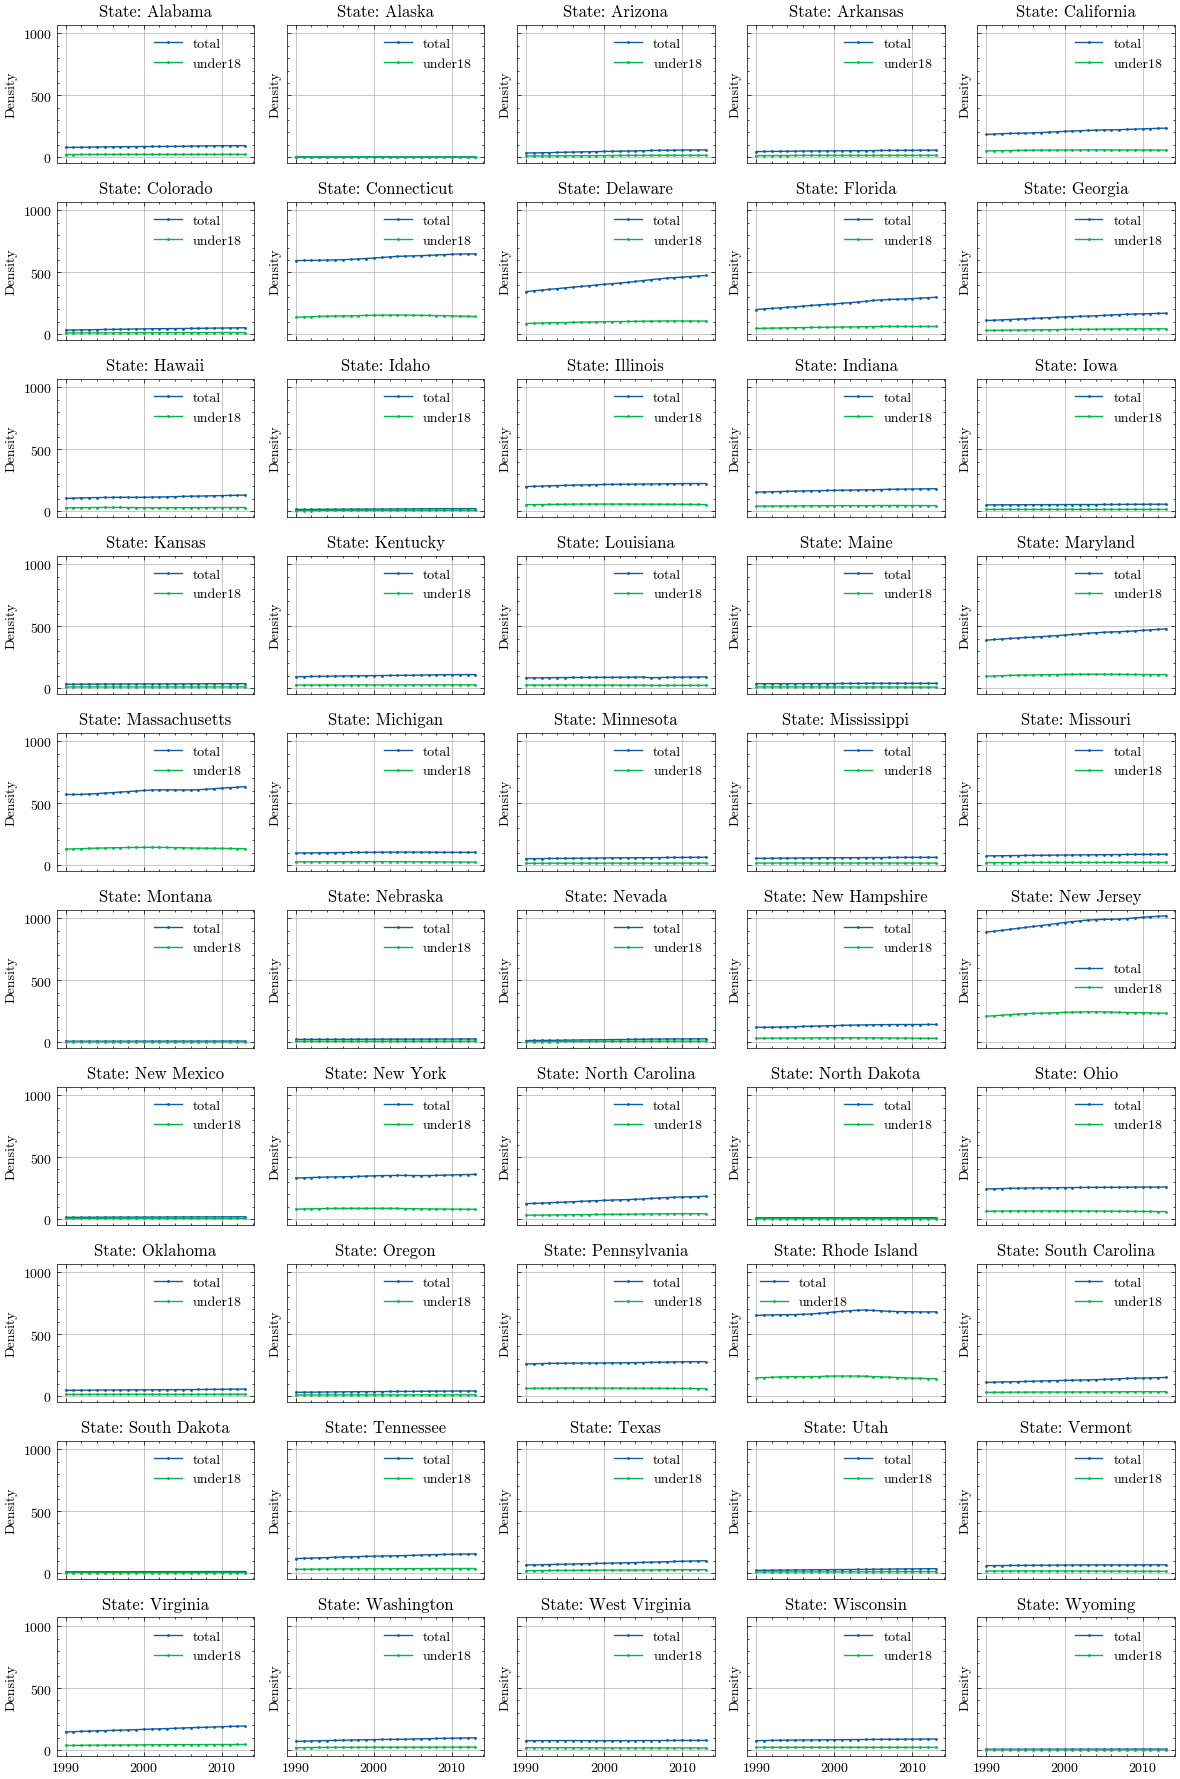

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science','no-latex'])

# Get the unique states
states = list(final_group['state'].unique())
states.remove('District of Columbia')

# Calculate the number of rows and columns for the grid layout
num_rows = min(10, len(states))
num_cols = min(6, (len(states) - 1) // 10 + 1)

# Create the figure and axes for the grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 18), sharex=True, sharey=True)

# Flatten the axes array
axes = axes.flatten()

# Iterate over each state and plot the density changes by year for each age group
for i, state in enumerate(states):
    ax = axes[i]
    state_data = final_group.loc[final_group["state"]==state]
    age_groups = state_data["ages"].unique()
    for age_group in age_groups:
        ax.plot(state_data.loc[state_data["ages"]==age_group,"year"], state_data.loc[state_data["ages"]==age_group,"density"], label=age_group,marker='o', markersize=1)
    ax.set_ylabel('Density')
    ax.set_title('State: {}'.format(state))
    ax.legend()
    ax.grid(True)


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()